In [1]:
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


# Beta plots

From [Codes for Unit 4: betaplots.m](https://www2.isye.gatech.edu/isye6420/supporting.html).

Associated lecture video: [Unit 4 Lesson 7: Ten Coin Flips Revisited](https://www.youtube.com/watch?v=KYI_xX5Tqwc&list=PLv0FeK5oXK4l-RdT6DWJj0_upJOG2WKNO&index=25).

Probably faster to use scipy for these plots, but going to stick with pymc3 so I don't have to worry about looking up parameterization differences.

Also, check out https://colcarroll.github.io/updating_beta/ for a cool visualization of the beta distribution.

In [2]:
params = [(.5, .5), (1, 1), (2, 2), (10, 10), (1, 5), (1, .4), (3, 5),
          (50, 30), (5000, 3000), (500, 500)]

def beta_dist(α, β, n):
    # note: this syntax will change when pymc 4.0 is released
    # new syntax will use new pm.draw() function
    name = f'α = {α}, β = {β}'
    return pm.Beta(name, α, β).random(size=n), name

with pm.Model() as betas:
    n = 1000000
    distributions = [beta_dist(α, β, n) for α, β in params]

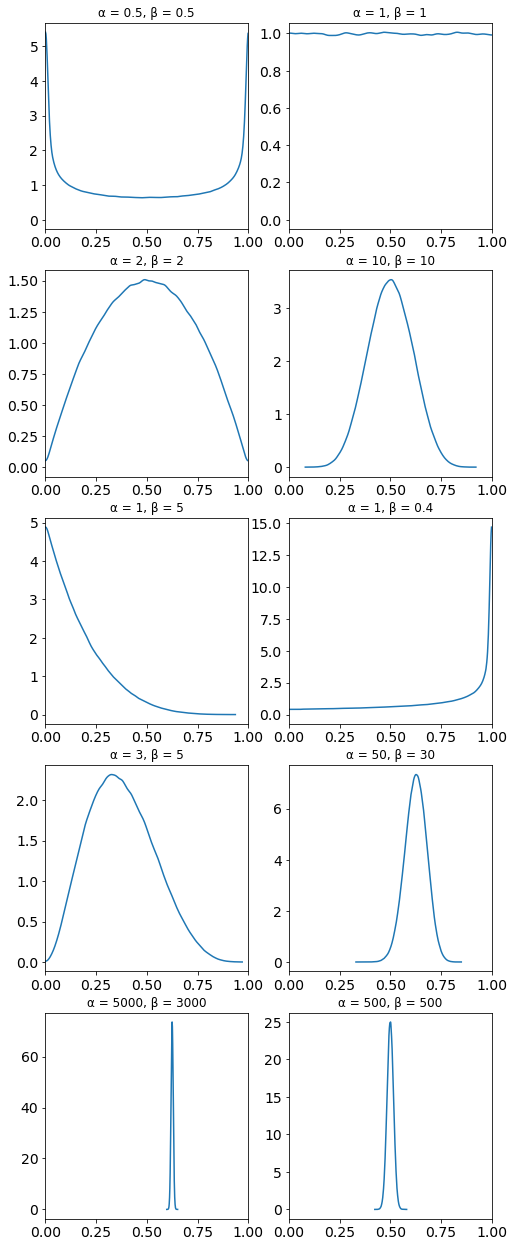

In [3]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(8, 22), sharex='col')

for i, dist in enumerate(distributions):
    plt.subplot(5, 2, i+1, autoscalex_on=False)
    az.plot_dist(dist[0], figsize=(2,2))
    plt.title(dist[1])

plt.xlim(0, 1)
plt.show()